In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
pd_data = pd.read_csv('parkinsons.data')

In [3]:
pd_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
pd_data.shape

(195, 24)

dataset comprises of 195 observations and 24 attributes  
out of which status is dependent variable and rest 23 are independent variables.

In [5]:
pd_data.columns.values

array(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype=object)

In [6]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

Data has object, float and integer values.

In [7]:
pd_data.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [8]:
pd_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Mean value is greater than median value of each column represented by 50%(50th percentile) in index column.
Notably large differnece in 75th %tile and max values of attributes "MDVP:Fhi(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ".
Thus above observations suggests that there are outliers in our dataset

In [9]:
#understanding target variable
pd_data.status.unique()

array([1, 0], dtype=int64)

In [10]:
pd_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

the target variable shows that 147 people are diagnosed with parkinson disease and 48 people are not diagnosed with disease.

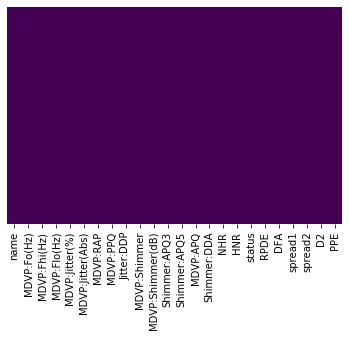

In [11]:
# Data visualization
#checking missing values
sns.heatmap(pd_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Dataset has no missing values

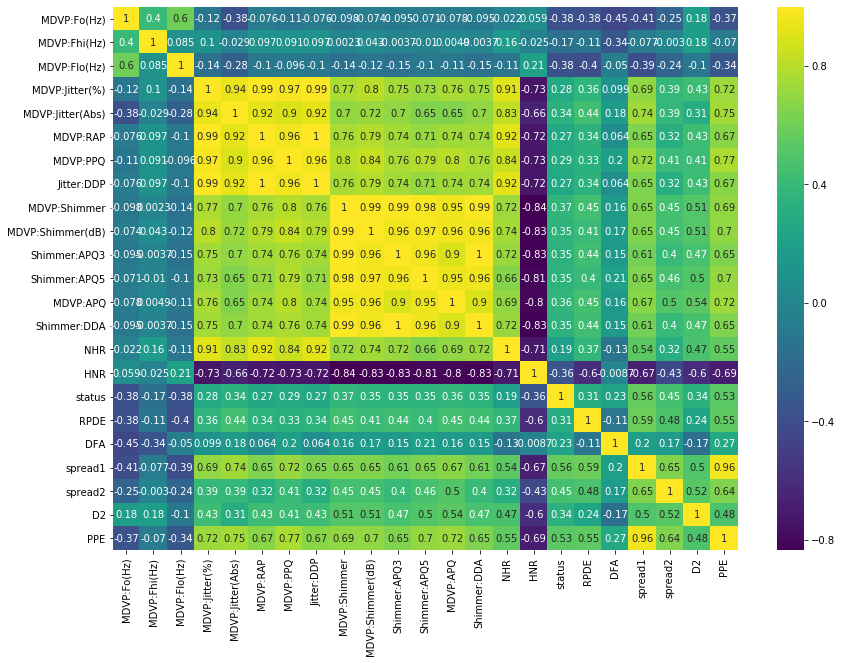

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(pd_data.corr(),cmap='viridis',annot=True) 

spread1 and PPE are strongly correlated.
MDVP:Fhi(Hz) and spread2 has almost no correlation.
HNR and DFA has almost no correlation.
shimmer:APQ3 shimmer:DDA has equal correlation 1
shimmer:DDA, MDVP:APQ, shimmer:APQ5, MDVP:shimmer(DB), MDVP:shimmer and shimmer:APQ3 are strongly correlated.
MDVP:jitter(%), MDVP:jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP and NHR are strongly correlated
Jitter:DDP and MDVP:RAP has equal correlation 1  
MDVP:Fhi(Hz) has almost no correlation with spread2, shimmer:DDA, MDVP:APQ, shimmer:APQ3 and MDVP:shimmer

In [15]:
#Dropping shimmer:APQ3 as shimmer:APQ3 and shimmer:DDA has equal correlation and both are not strongly correlated with the target varible.
#Dropping  jitter:DDP as jitter:DDP and MDVP:RAP has equal correlation and both are not strongly correlated with the target varible.       
pd_data = pd_data.drop(['Shimmer:APQ3', 'Jitter:DDP'], axis=1)

In [17]:
#As MDVP:Shimmer is highly correlated with MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA, we can drop all except MDVP:Shimmer  
pd_data = pd_data.drop(['MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'], axis=1)

In [18]:
#As MDVP:Jitter(Abs) is highly correlated with MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ and Jitter:DDP, we can drop MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ and Jitter:DDP                         
pd_data = pd_data.drop(['MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ'], axis=1)

In [20]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 19 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 29.0+ KB


<Figure size 1368x6821.05 with 0 Axes>

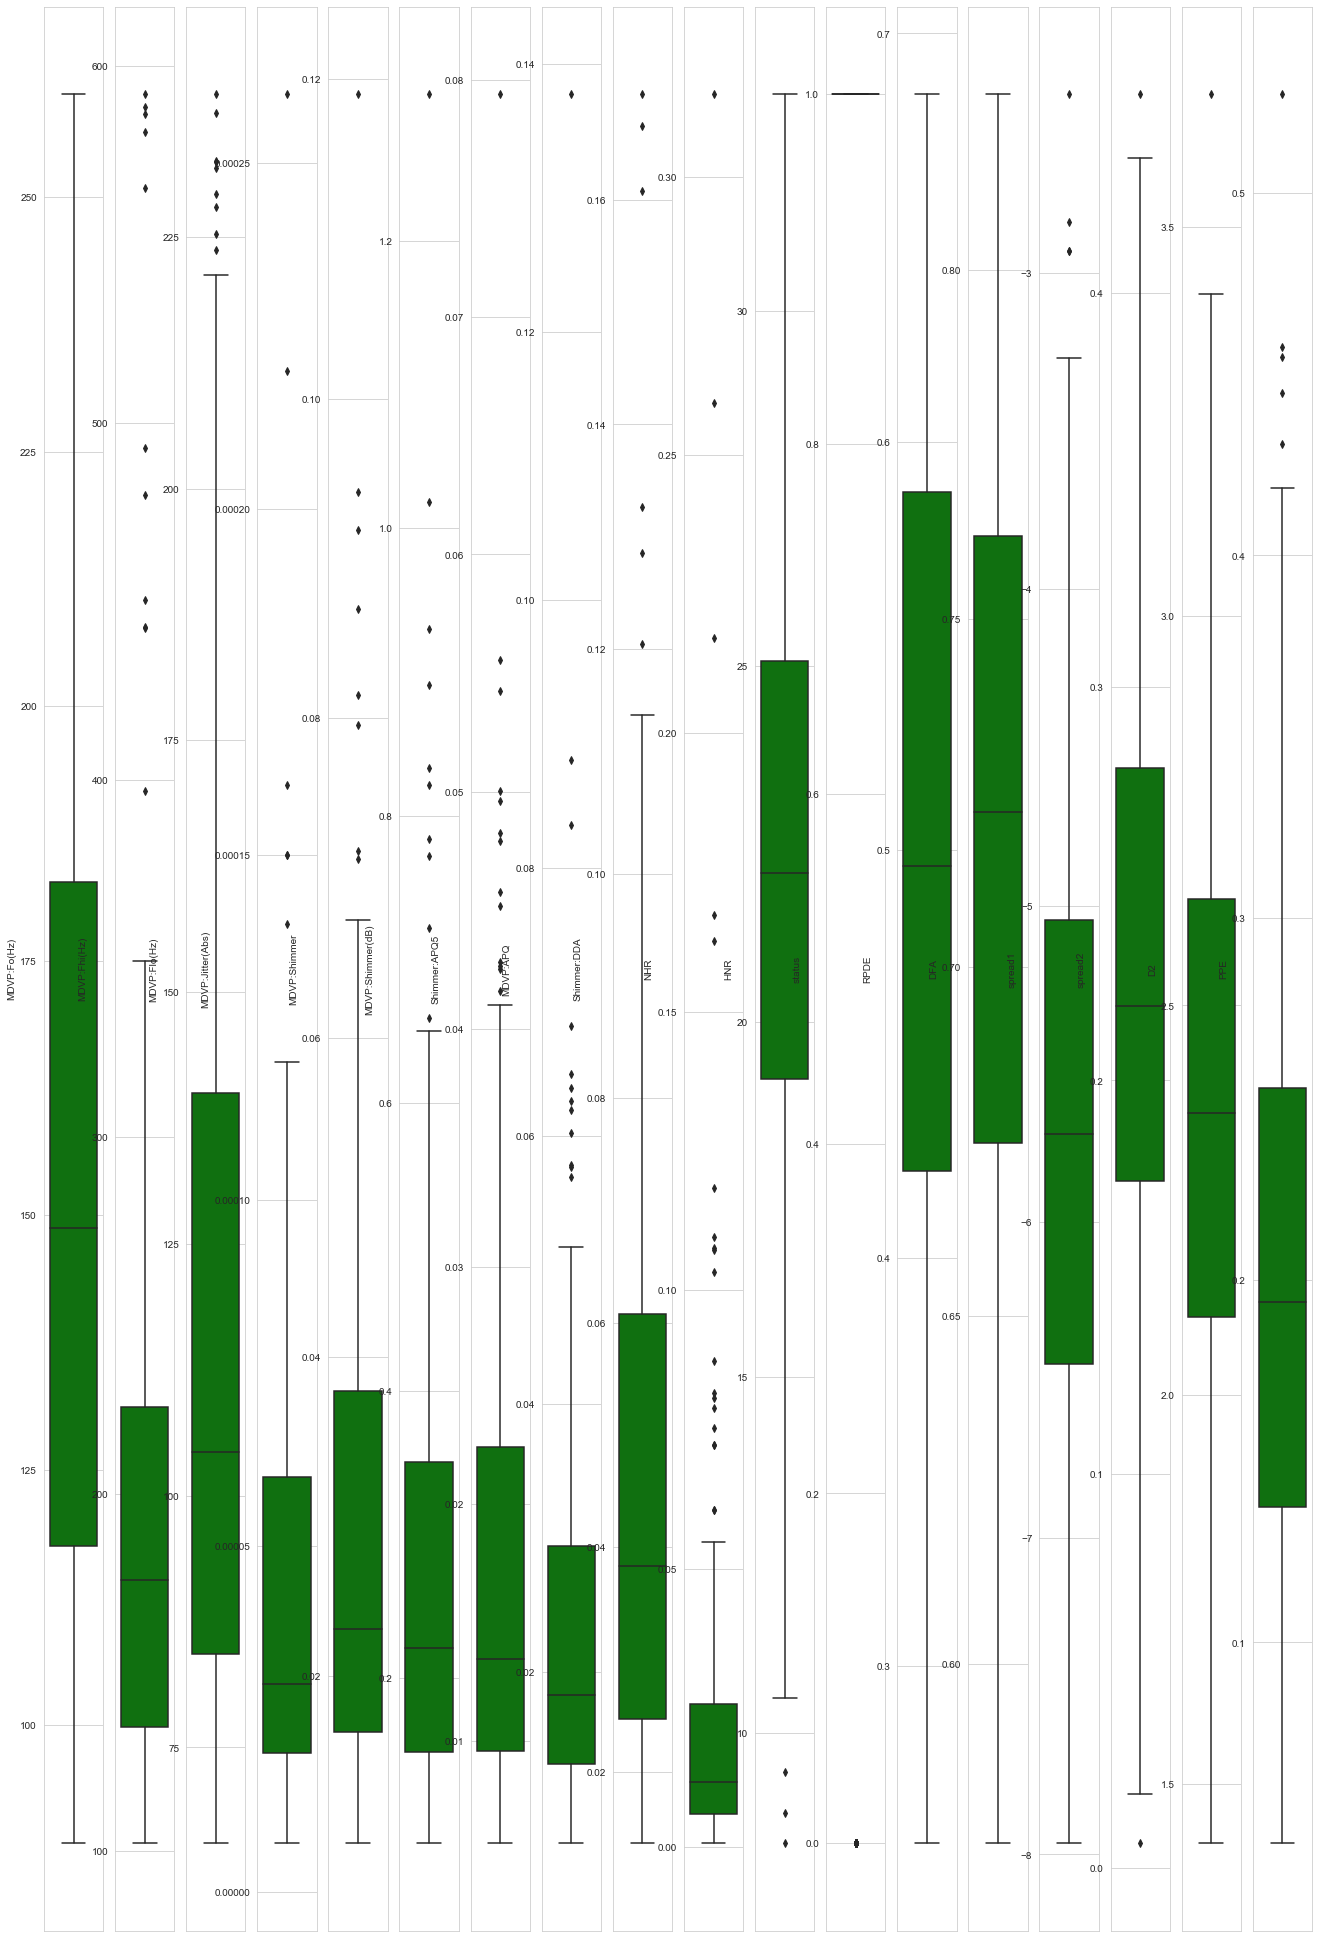

In [22]:
l = pd_data.columns.values
number_of_columns=19
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
plt.figure(figsize=(24,800))
for i in range(0,len(l)):
    if pd_data[l[i]].dtypes != object:
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(pd_data[l[i]],color='green',orient='v')

 all columns have outliers except 'RPDE', 'DFA' and 'MDVP:Fo(Hz)'

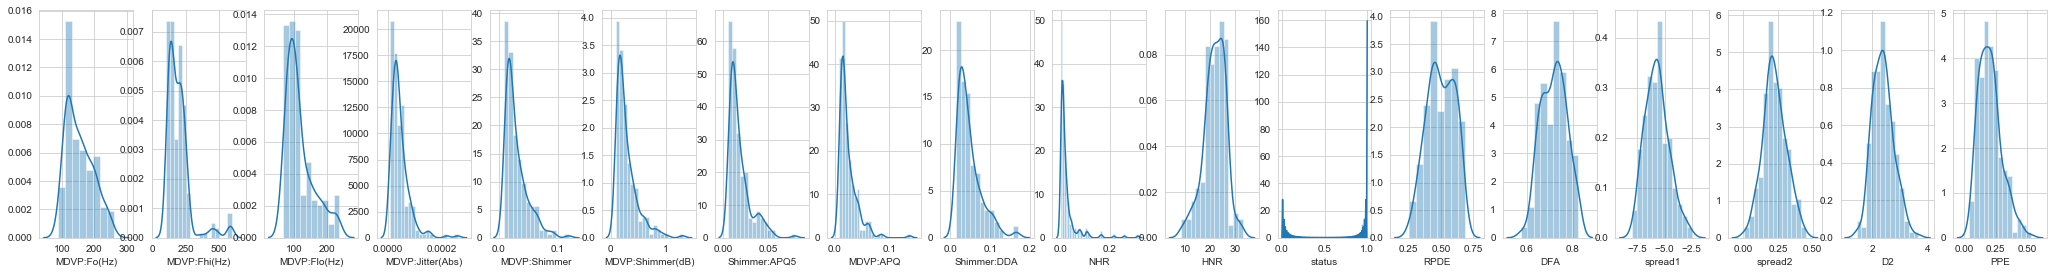

In [23]:
#To check distribution-Skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    if pd_data[l[i]].dtype != object:
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.distplot(pd_data[l[i]], kde=True) 

'PPE', 'D2', 'spread1', 'spread2', 'DFA', 'RPDE', "HNR" columns appear to be normally distributed.
remaining all independent variables are right skewed .

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Decision tree can take only numerical / categorical columns. It cannot take string / obeject types. 
pd_data['name'] = pd.Categorical(pd_data['name']).codes # Replace strings with an integer

In [26]:
X = pd_data.drop('status', axis=1)
y = pd_data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from IPython.display import Image  
from sklearn import tree
from os import system

parkinsons_disease_file = open('parkinsons_disease.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=parkinsons_disease_file, feature_names = list(X_train), class_names = list(X_train.columns))

parkinsons_disease_file.close()


In [30]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                       Imp
name              0.367861
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.102307
MDVP:Jitter(Abs)  0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.042768
PPE               0.387263


In [40]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below
#system("dot -Tpng parkinsons_disease.dot -o parkinsons_disease.png")
#Image("parkinsons_disease.png", width=100, height = 100)

In [32]:
y_predict = dt_model.predict(X_test)

In [34]:
print("Decision tree model accuracy on train data is: ", dt_model.score(X_train , y_train))
print("Decision tree model accuracy on test data is: ", dt_model.score(X_test , y_test))

Decision tree model accuracy on train data is:  1.0
Decision tree model accuracy on test data is:  0.9322033898305084


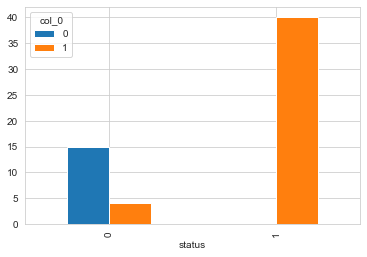

In [35]:
pd.crosstab(y_test, y_predict).plot(kind='bar')

In [36]:
pd.crosstab(y_test, y_predict)

col_0,0,1
status,,
0,15,4
1,0,40


out of 59 patients, model has predicted 17 patients with no parkinsons disease and 38 with parkinsons disease and for 2 records it predicted wrongly.


In [41]:
print(metrics.confusion_matrix(y_test, y_predict))

[[15  4]
 [ 0 40]]


In [42]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), recall_score(y_test, y_predict, average= 'weighted'), precision_score(y_test, y_predict, average= 'weighted'), f1_score(y_test, y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])


,0
accuracy,0.932203
recall,0.932203
precision,0.938367
f1_score,0.929830


model accuracy on train data is 100% which means overfitting i.e. varience error is high. 
its better to regularise the model.
model accuracy on test data is 93%

In [44]:
#Regularising the model
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 7)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
parkinsons_disease_regularized = open('parkinsons_disease_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= parkinsons_disease_regularized , feature_names = list(X_train), class_names = list(X_train.columns))

parkinsons_disease_regularized.close()

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                       Imp
name              0.430285
MDVP:Fo(Hz)       0.000000
MDVP:Fhi(Hz)      0.116736
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.452979


In [54]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
#system("dot -Tpng parkinsons_disease_regularized.dot -o parkinsons_disease_regularized.png")

In [55]:
print("Regularised model accuracy on train data: ", reg_dt_model.score(X_train , y_train))
print("Regularised model accuracy on test data: ",reg_dt_model.score(X_test , y_test))

Regularised model accuracy on train data:  0.9632352941176471
Regularised model accuracy on test data:  0.9152542372881356


Regularization has improved the model from overfitting to good model with an accuracy of 96% on the train data. i.e
Regularization has helped by reducing the varience of the model without much increase in its bias so that model is better at predicting.

In [56]:
# Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier
a = np.arange(2,100)
scores = {}
for i in a:
    rfcl = RandomForestClassifier(n_estimators = i , criterion='entropy', max_depth=7, min_samples_leaf = 7, random_state=7)
    rfcl = rfcl.fit(X_train, y_train)
    scores[i] = rfcl.score(X_train , y_train)
    
maxScore = max(scores, key=scores.get)
print("The optimal number of trees that gives the best result is: ", maxScore)
print("Accuracy at this number is: ", scores[maxScore])

The optimal number of trees that gives the best result is:  15
Accuracy at this number is:  0.9632352941176471


In [58]:
print("Random forest classifier accuracy on test data: ", rfcl.score(X_test , y_test))

Random forest classifier accuracy on test data:  0.864406779661017


In [59]:
rfcl_y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, rfcl_y_predict))

[[11  8]
 [ 0 40]]


In [60]:
pd.DataFrame(data=[accuracy_score(y_test, rfcl_y_predict), recall_score(y_test, rfcl_y_predict, average= 'weighted'), precision_score(y_test, rfcl_y_predict, average= 'weighted'), f1_score(y_test, rfcl_y_predict, average= 'weighted')], index=['accuracy', 'recall', 'precision', 'f1_score'])


,0
accuracy,0.864407
recall,0.864407
precision,0.887006
f1_score,0.852491


Regularization has improved the model accuracy.